# A/B Testing for the Cookie Cats Mobile Game
## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data inspection & Exploaratory analysis
#### 3.1. Sample size and other column meanings
#### 3.2. check the null value
#### 3.3. check distribution
### 4. Interpret A/B Testing results
#### 4.1. Explaination
#### 4.2. Pearson's chi-test
#### 4.3. check out the retention rate
### 5. recommendation


## 1. Problem formulation and expected result
### The Cookie Cat Mobile game is a game in which the players progress though the game, while they do that, they encounter gates where they have to wait to go to the next game. The current first gate appears at level 30, and we would like to know if the retention rate of the players change, if the first gate appears at a different level (level 40). A/B Testing is a way to test it.
### Here are some steps before the A/B Testing:
#### a. Prerequisites
##### a.1. Hypothesis: 
##### H0: There is no difference between the retention of the user whether the gate is at level 40 or level 30
##### H1: There is a difference between the retention of the user when the gate is at level 40 instead of level 30
##### a.2. Decide the key metric: 
##### when all over conditions stay the same, the key metric should be able to reflect the change of the independent variable (level when the gate appears). In this case, the key metric is the retention of the users.
#### b. Experiment design - since the experiment data is given, let's discover some of the information listed below through exploratory analysis and use the business standard significance level.
##### b.1. Population: players that installed the game
##### b.2. Sample size: 90189
##### b.4. Significance level: 0.05
#### After that, let us analyze the data to make sure the data is reliable and interpret the results.

## 2. Preparation
### 2.1.  Load packages and settings

In [1]:
#load packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [3]:
#see all columns
pd.set_option('display.max_columns', None)

In [4]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [5]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2. Load data

In [6]:
raw_data = pd.read_csv('/Users/juli/Desktop/ML/cookie_cats.csv')

## 3. Data inspection & Exploaratory analysis
### 3.1. Sample size and other column meanings

In [7]:
#check the first 5 rows
raw_data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
#check the amount of rows and columns
raw_data.shape

(90189, 5)

In [9]:
# check the unique values in each column
for col in raw_data:
    print(col)
    print(raw_data[col].unique())
    print(len(raw_data[col].unique()))
    print('\n')

userid
[    116     337     377 ... 9999710 9999768 9999861]
90189


version
['gate_30' 'gate_40']
2


sum_gamerounds
[    3    38   165     1   179   187     0     2   108   153    30    39
   305    73    14   204     9     5    45   105     4    80    53    37
    13    50   202    23   103    27    15    49     7   386    25    12
     6    29   136    10    76   138    94    26   127    21   297    33
   139    19    16    95     8   106    22    11   246    54    66   122
    75    17    24    47    31    34    56    60    67    42    65   129
    51    46   104    36    20    74    72    18    79    99    91   149
    68   277   493   274    32    85   191   115   134   152   100   250
   147   391    61    57    35    77   197    69   260    48   270    59
   141   467    40    43    93   222   334    58    84    41   303   177
   216   227    87    71   567    55    78   552    96   107    28   113
   339   452   148   163   220    63   290    86   356   117   298   338
   170

##### The sample size of the experiment is 90189 and every user id is unique.
##### Other column meanings: 
##### - version: whether the players are put in the control group (gate_30) or the treatment group (gate_40). When a player installed the game, he or she was randomly assigned to either.
##### - sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.
##### - retention_1: Did the player come back and play 1 day after installing?
##### - retention_7: Did the player come back and play 7 days after installing?

### 3.2. check the null value

In [10]:
raw_data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

##### There is no null value

### 3.3. check distribution

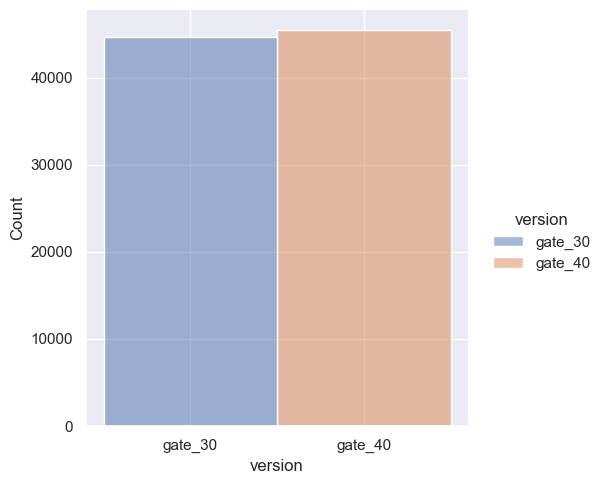

In [26]:
# check the distribution of the control and treatment groups
sns.displot(data=raw_data, x='version', hue='version')

##### the players assigned to both groups are about the same amount

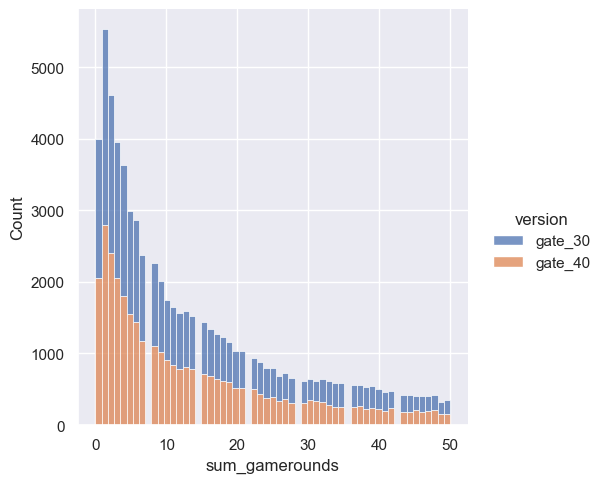

In [44]:
# check the distribution of the number of game rounds played during the first 14 days after installed  v.s. control and treatment group
sns.displot(raw_data[raw_data['sum_gamerounds']<=50], x='sum_gamerounds', hue='version', multiple='stack')

##### since there is extreme outlier who is playing the game about 50000 times, and most of the players play no more than 50 times, let's see the distribution of the players playing up till 50 times. In general, more game rounds are played by the players assigned to the control group.

<AxesSubplot:xlabel='retention_1', ylabel='count'>

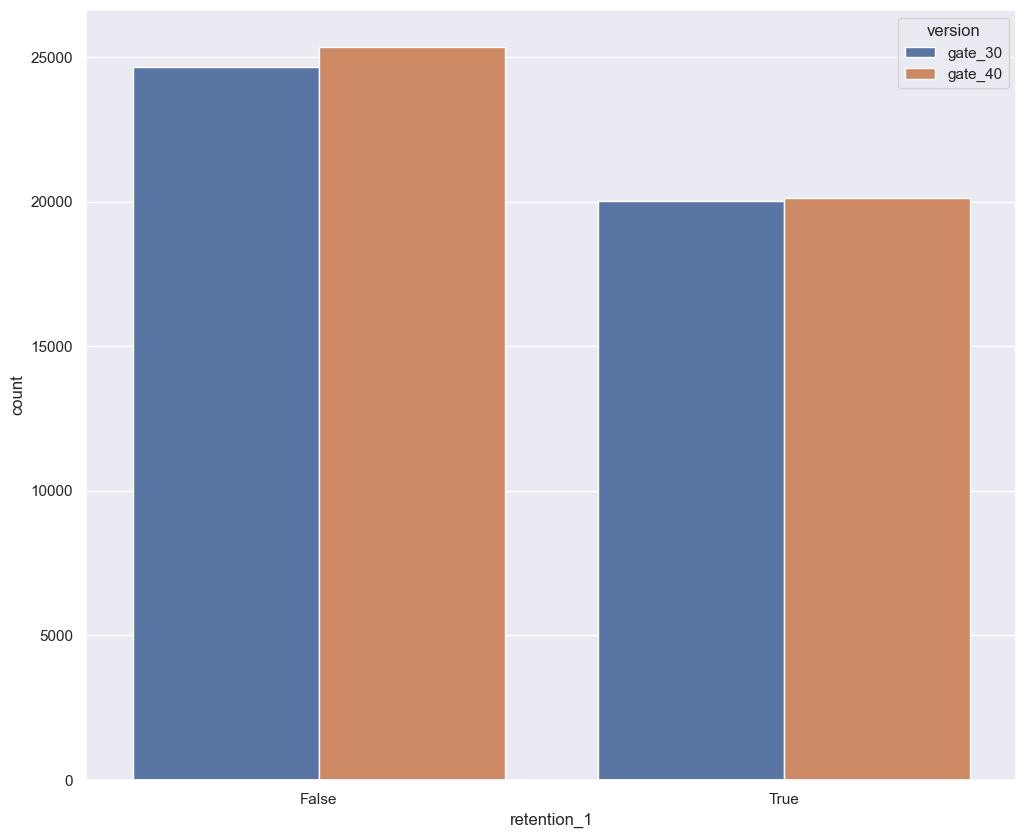

In [47]:
# the distribution of retentions v.s. control and treatment group
# players coming back 1 day after installing the game
sns.countplot(raw_data, x='retention_1', hue='version')

##### Players from both groups have about the same amount of players comeing back/not coming back 1 day after installing the game. 

<AxesSubplot:xlabel='retention_7', ylabel='count'>

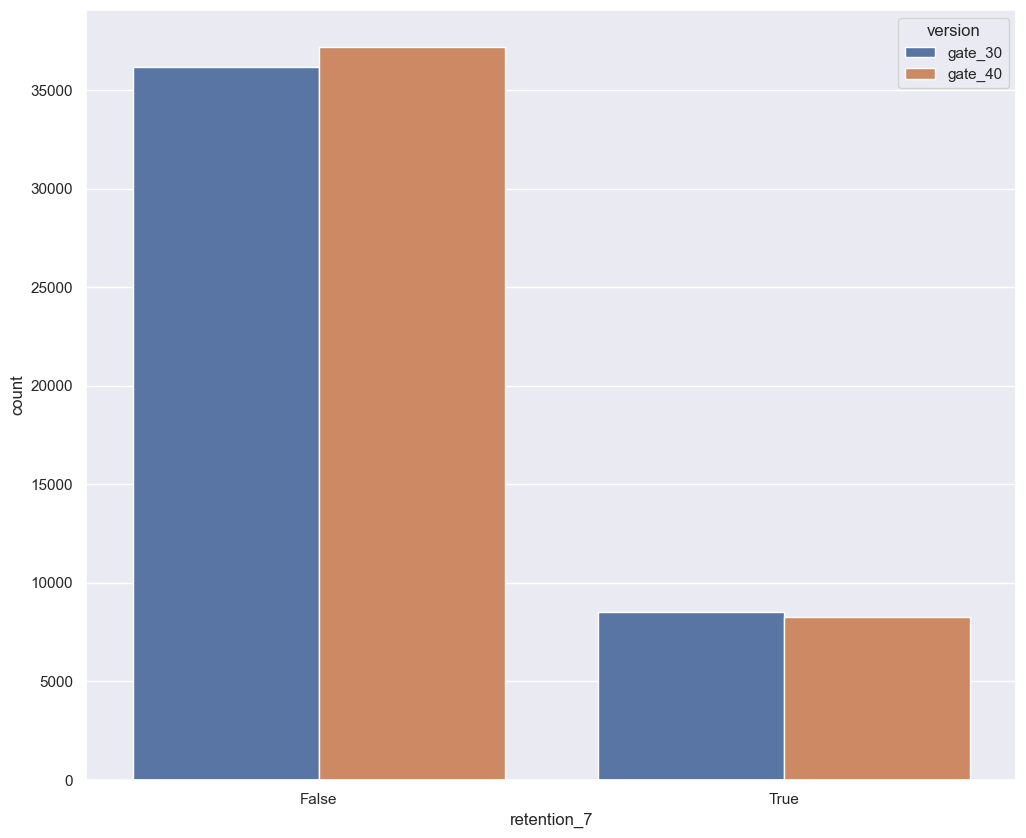

In [48]:
# players coming back 7 day after installing the game
sns.countplot(raw_data, x='retention_7', hue='version')

##### 7 days after installing the game, way less players from both groups returned to the game. However, players from both groups have about the same amount of players comeing back/not coming back 7 day after installing the game. 

##### It seems like there's not much difference of the user retention between the two groups, but there seems to be a big difference of the game rounds played withing 14 days after installing between the two groups.

##### However, the test is about retention, so let's interpret the result of A/B Testing to see if it really makes a difference of user retention by changing the gate level.

## 4. Interpret A/B Testing results
### 4.1. Explaination
##### H0: There is no difference between the retention of the user whether the gate is at level 40 or level 30.
##### H1: There is a difference between the retention of the user when the gate is at level 40 instead of level 30.
##### When the p-value < significance level (0.05), then we reject the H0.

### 4.2. Pearson's chi-test
##### Since the key metric has discrete values (True or False) and the sample size is large (90189), we use the Pearson's chi-test

In [49]:
# retention for 1 day after installing the game
# group by
day_1 = raw_data.groupby(['version','retention_1']).size()
day_1

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [51]:
# transform to table
retention_1 = pd.DataFrame(data=[[20034,20119],[24666,25370]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_1

,gate_30,gate_40
True,20034,20119
False,24666,25370


In [52]:
# run test
chi2_val, p_val = chi2_contingency(retention_1.values, correction=False)[:2]

alpha=0.05

p_val


0.07440965529692188

##### Since the p-value is more than 0.05, we accept the H0, that means There is no difference between the retention 1 day after installing the game whether the gate is at level 40 or level 30.

In [53]:
# retention for 7 day after installing the game
# group by
day_7 = raw_data.groupby(['version','retention_7']).size()
day_7

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [54]:
# transform to table
retention_7 = pd.DataFrame(data=[[8502,8279],[36198,37210]],
                  index=["True","False"],
                  columns=["gate_30","gate_40"])
retention_7

,gate_30,gate_40
True,8502,8279
False,36198,37210


In [55]:
chi2_val, p_val = chi2_contingency(retention_7.values, correction=False)[:2]

alpha=0.05

p_val

0.0015542499756142805

##### Since the p-value is less than 0.05, we reject the H0, that means There is a difference between the retention 7 day after installing the game when the gate is at level 40 instead of level 30.

### 4.3. check out the retention rate

In [58]:
# retention rate of 1 day after installing gate level 40 v.s. gate level 30
raw_data.groupby('version')['retention_1'].sum() / raw_data.groupby('version')['retention_1'].count().to_frame(30).T

version,gate_30,gate_40
30,0.448188,0.442283


##### The retention rate of 1 day after installing the game for gate level 40 is about 0.006 lower than gate level 30.

In [59]:
# retention rate of 7 day after installing gate level 40 v.s. gate level 30
raw_data.groupby('version')['retention_7'].sum() / raw_data.groupby('version')['retention_7'].count().to_frame(30).T

version,gate_30,gate_40
30,0.190201,0.182


##### The retention rate of 7 day after installing the game for gate level 40 is about 0.008 lower than gate level 30.

## Recommendation
##### There is no statistical significant difference bewteen gate level 40 and gate level 30 when it's 1 day after installing the game. However, there is a statistical significant difference bewteen gate level 40 and gate level 30 when it's 7 day after installing the game, and the retention rate is lower when the gate is at level 40. So the gate should stay at level 30 for now. 
##### We could explore further about the difference of the game rounds played between gate at level 30 or at a different level, since gate level as an independent veriable may impact the keys metrics in regard to game rounds.